# Rf 7 0 7_Kernelestimation

Special p.d.f.'s: using non-parametric (multi-dimensional) kernel estimation p.d.f.s




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:03 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create low stats 1D dataset
-------------------------------------------------------

Create a toy pdf for sampling

In [2]:
x = ROOT.RooRealVar("x", "x", 0, 20)
p = ROOT.RooPolynomial("p", "p", x, ROOT.RooArgList(ROOT.RooFit.RooConst(
    0.01), ROOT.RooFit.RooConst(-0.01), ROOT.RooFit.RooConst(0.0004)))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Sample 500 events from p

In [3]:
data1 = p.generate(ROOT.RooArgSet(x), 200)

Create 1D kernel estimation pdf
---------------------------------------------------------------

Create adaptive kernel estimation pdf. In self configuration the input data
is mirrored over the boundaries to minimize edge effects in distribution
that do not fall to zero towards the edges

In [4]:
kest1 = ROOT.RooKeysPdf("kest1", "kest1", x, data1,
                        ROOT.RooKeysPdf.MirrorBoth)

An adaptive kernel estimation pdf on the same data without mirroring option
for comparison

In [5]:
kest2 = ROOT.RooKeysPdf("kest2", "kest2", x, data1,
                        ROOT.RooKeysPdf.NoMirror)

Adaptive kernel estimation pdf with increased bandwidth scale factor
(promotes smoothness over detail preservation)

In [6]:
kest3 = ROOT.RooKeysPdf("kest1", "kest1", x, data1,
                        ROOT.RooKeysPdf.MirrorBoth, 2)

Plot kernel estimation pdfs with and without mirroring over data

In [7]:
frame = x.frame(
    ROOT.RooFit.Title("Adaptive kernel estimation pdf with and w/o mirroring"),
    ROOT.RooFit.Bins(20))
data1.plotOn(frame)
kest1.plotOn(frame)
kest2.plotOn(frame, ROOT.RooFit.LineStyle(
    ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_x_5598b8362a90") at 0x5598b8362a90>

Plot kernel estimation pdfs with regular and increased bandwidth

In [8]:
frame2 = x.frame(ROOT.RooFit.Title(
    "Adaptive kernel estimation pdf with regular, bandwidth"))
kest1.plotOn(frame2)
kest3.plotOn(frame2, ROOT.RooFit.LineColor(ROOT.kMagenta))

<ROOT.RooPlot object ("frame_x_5598b8a76060") at 0x5598b8a76060>

Create low status 2D dataset
-------------------------------------------------------

Construct a 2D toy pdf for sampleing

In [9]:
y = ROOT.RooRealVar("y", "y", 0, 20)
py = ROOT.RooPolynomial("py", "py", y, ROOT.RooArgList(ROOT.RooFit.RooConst(
    0.01), ROOT.RooFit.RooConst(0.01), ROOT.RooFit.RooConst(-0.0004)))
pxy = ROOT.RooProdPdf("pxy", "pxy", ROOT.RooArgList(p, py))
data2 = pxy.generate(ROOT.RooArgSet(x, y), 1000)

Create 2D kernel estimation pdf
---------------------------------------------------------------

Create 2D adaptive kernel estimation pdf with mirroring

In [10]:
kest4 = ROOT.RooNDKeysPdf("kest4", "kest4", ROOT.RooArgList(x, y), data2, "am")

Create 2D adaptive kernel estimation pdf with mirroring and double
bandwidth

In [11]:
kest5 = ROOT.RooNDKeysPdf(
    "kest5", "kest5", ROOT.RooArgList(
        x, y), data2, "am", 2)

Create a histogram of the data

In [12]:
hh_data = ROOT.RooAbsData.createHistogram(
    data2, "hh_data", x, ROOT.RooFit.Binning(10), ROOT.RooFit.YVar(
        y, ROOT.RooFit.Binning(10)))

Create histogram of the 2d kernel estimation pdfs

In [13]:
hh_pdf = kest4.createHistogram("hh_pdf", x, ROOT.RooFit.Binning(
    25), ROOT.RooFit.YVar(y, ROOT.RooFit.Binning(25)))
hh_pdf2 = kest5.createHistogram("hh_pdf2", x, ROOT.RooFit.Binning(
    25), ROOT.RooFit.YVar(y, ROOT.RooFit.Binning(25)))
hh_pdf.SetLineColor(ROOT.kBlue)
hh_pdf2.SetLineColor(ROOT.kMagenta)

c = ROOT.TCanvas("rf707_kernelestimation",
                 "rf707_kernelestimation", 800, 800)
c.Divide(2, 2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.8)
frame2.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
hh_data.GetZaxis().SetTitleOffset(1.4)
hh_data.Draw("lego")
c.cd(4)
ROOT.gPad.SetLeftMargin(0.20)
hh_pdf.GetZaxis().SetTitleOffset(2.4)
hh_pdf.Draw("surf")
hh_pdf2.Draw("surfsame")

c.SaveAs("rf707_kernelestimation.png")

Info in <TCanvas::Print>: png file rf707_kernelestimation.png has been created


Draw all canvases 

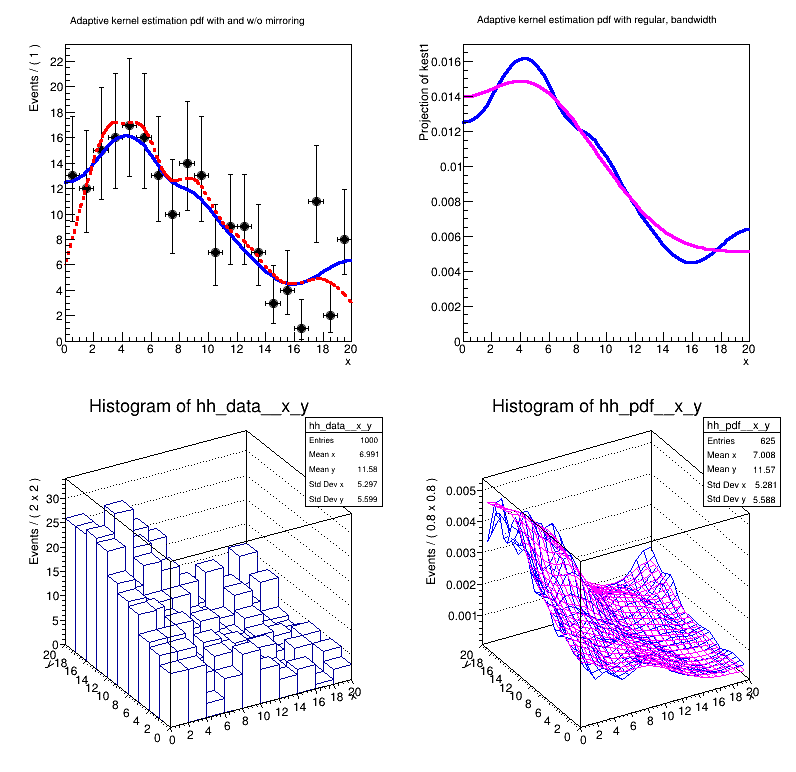

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()